# Lab 2

Elizabeth Berry

GSB 544

10/9/23

In [11]:
# Data Set-Up

# Step 0: Import data and declare package dependencies.
import pandas as pd
pd.set_option('display.max_rows', 500)

filepath = "/Users/elleberry/Desktop/Classes/MBA/GSB 544 - Computing and Machine Learning/Data/avocadoprices.csv"

# Read the CSV files into DataFrame
avoprices = pd.read_csv(filepath)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [2]:
# Step 1: Describe the data set. What information does it contain?

In [15]:
# Step 2: Clean the data

# Create a list to store the corresponding geotypes
def map_geotype(geography):
    if geography in ['Baltimore/Washington', 'California', 'New York', 'South Carolina']:
        return 'State'
    elif geography in [
        'Albany', 'Atlanta', 'Boise', 'Boston', 'Charlotte', 'Chicago', 'Columbus', 'Denver', 
        'Detroit', 'Grand Rapids', 'Great Lakes', 'Houston', 'Indianapolis', 'Jacksonville', 
        'Las Vegas', 'Los Angeles', 'Louisville', 'Nashville',  'Orlando', 'Philadelphia', 
        'Pittsburgh', 'Portland', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco', 
        'Seattle', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa'
    ]:
        return 'City'
    elif geography in [
       'Buffalo/Rochester', 'Cincinnati/Dayton', 'Dallas/Ft. Worth', 'Harrisburg/Scranton', 'Hartford/Springfield',
       'Miami/Ft. Lauderdale', 'New Orleans/Mobile', 'Phoenix/Tucson', 'Raleigh/Greensboro', 'Richmond/Norfolk'
    ]:
        return 'Metro Region'
    elif geography in [
        'Midsouth', 'Northeast', 'Northern New England', 'Plains', 'South Central',
        'Southeast', 'West', 'West Tex/New Mexico'
    ]:
        return 'Major Region'
    else:
        return 'Unknown'

# Apply the custom function to create the 'geotype' column
avoprices['geotype'] = avoprices['geography'].apply(map_geotype)

print(avoprices[['geotype', 'geography']].head(110))

          geotype             geography
0            City                Albany
1            City                Albany
2            City               Atlanta
3            City               Atlanta
4           State  Baltimore/Washington
5           State  Baltimore/Washington
6            City                 Boise
7            City                 Boise
8            City                Boston
9            City                Boston
10   Metro Region     Buffalo/Rochester
11   Metro Region     Buffalo/Rochester
12          State            California
13          State            California
14           City             Charlotte
15           City             Charlotte
16           City               Chicago
17           City               Chicago
18   Metro Region     Cincinnati/Dayton
19   Metro Region     Cincinnati/Dayton
20           City              Columbus
21           City              Columbus
22   Metro Region      Dallas/Ft. Worth
23   Metro Region      Dallas/Ft. Worth


In [17]:
avoprices = avoprices.rename(columns={'4046': 'small_avo', '4225': 'medium_avo', '4770': 'large_avo'})

,date,average_price,total_volume,small_avo,medium_avo,large_avo,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geotype
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,City
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,City
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,City
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,City
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,State


In [18]:
# Exercises

# Step 3: Which major geographical region sold the most total organic, small Hass avocados in 2017?

# Filter the dataset for the year 2017, organic avocados, and small avocados
filtered_data = avoprices[(avoprices['year'] == 2017) & (avoprices['type'] == 'organic') & (avoprices['geotype'] == 'Major Region')]

# Group the filtered data by "geography" and calculate the sum of "small_avo" for each region
region_sales_2017 = filtered_data.groupby('geography')['small_avo'].sum()

# Find the region with the highest total small avocado sales in 2017
max_region = region_sales_2017.idxmax()
max_sales = region_sales_2017.max()

print(f"The major geographical region that sold the most total organic, small avocados in 2017 was {max_region} with {max_sales} units sold.")

The major geographical region that sold the most total organic, small avocados in 2017 was West with 1870206.29 units sold.


In [19]:
# Step 4: Split the date variable into month, day, and year variables. 
# In which month is the highest average volume of avocado sales?

avoprices['year'] = pd.to_datetime(avoprices['date']).dt.year
avoprices['month'] = pd.to_datetime(avoprices['date']).dt.month
avoprices['day'] = pd.to_datetime(avoprices['date']).dt.day

# Calculate the average volume of avocado sales for each month
monthly_avg_sales = avoprices.groupby('month')['total_volume'].mean()

# Find the month with the highest average volume of avocado sales
monthly_avg_sales.idxmax()

5

/var/folders/2s/fpkp2sm54wn5370x80nz75lc0000gn/T/ipykernel_26155/2768334602.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator


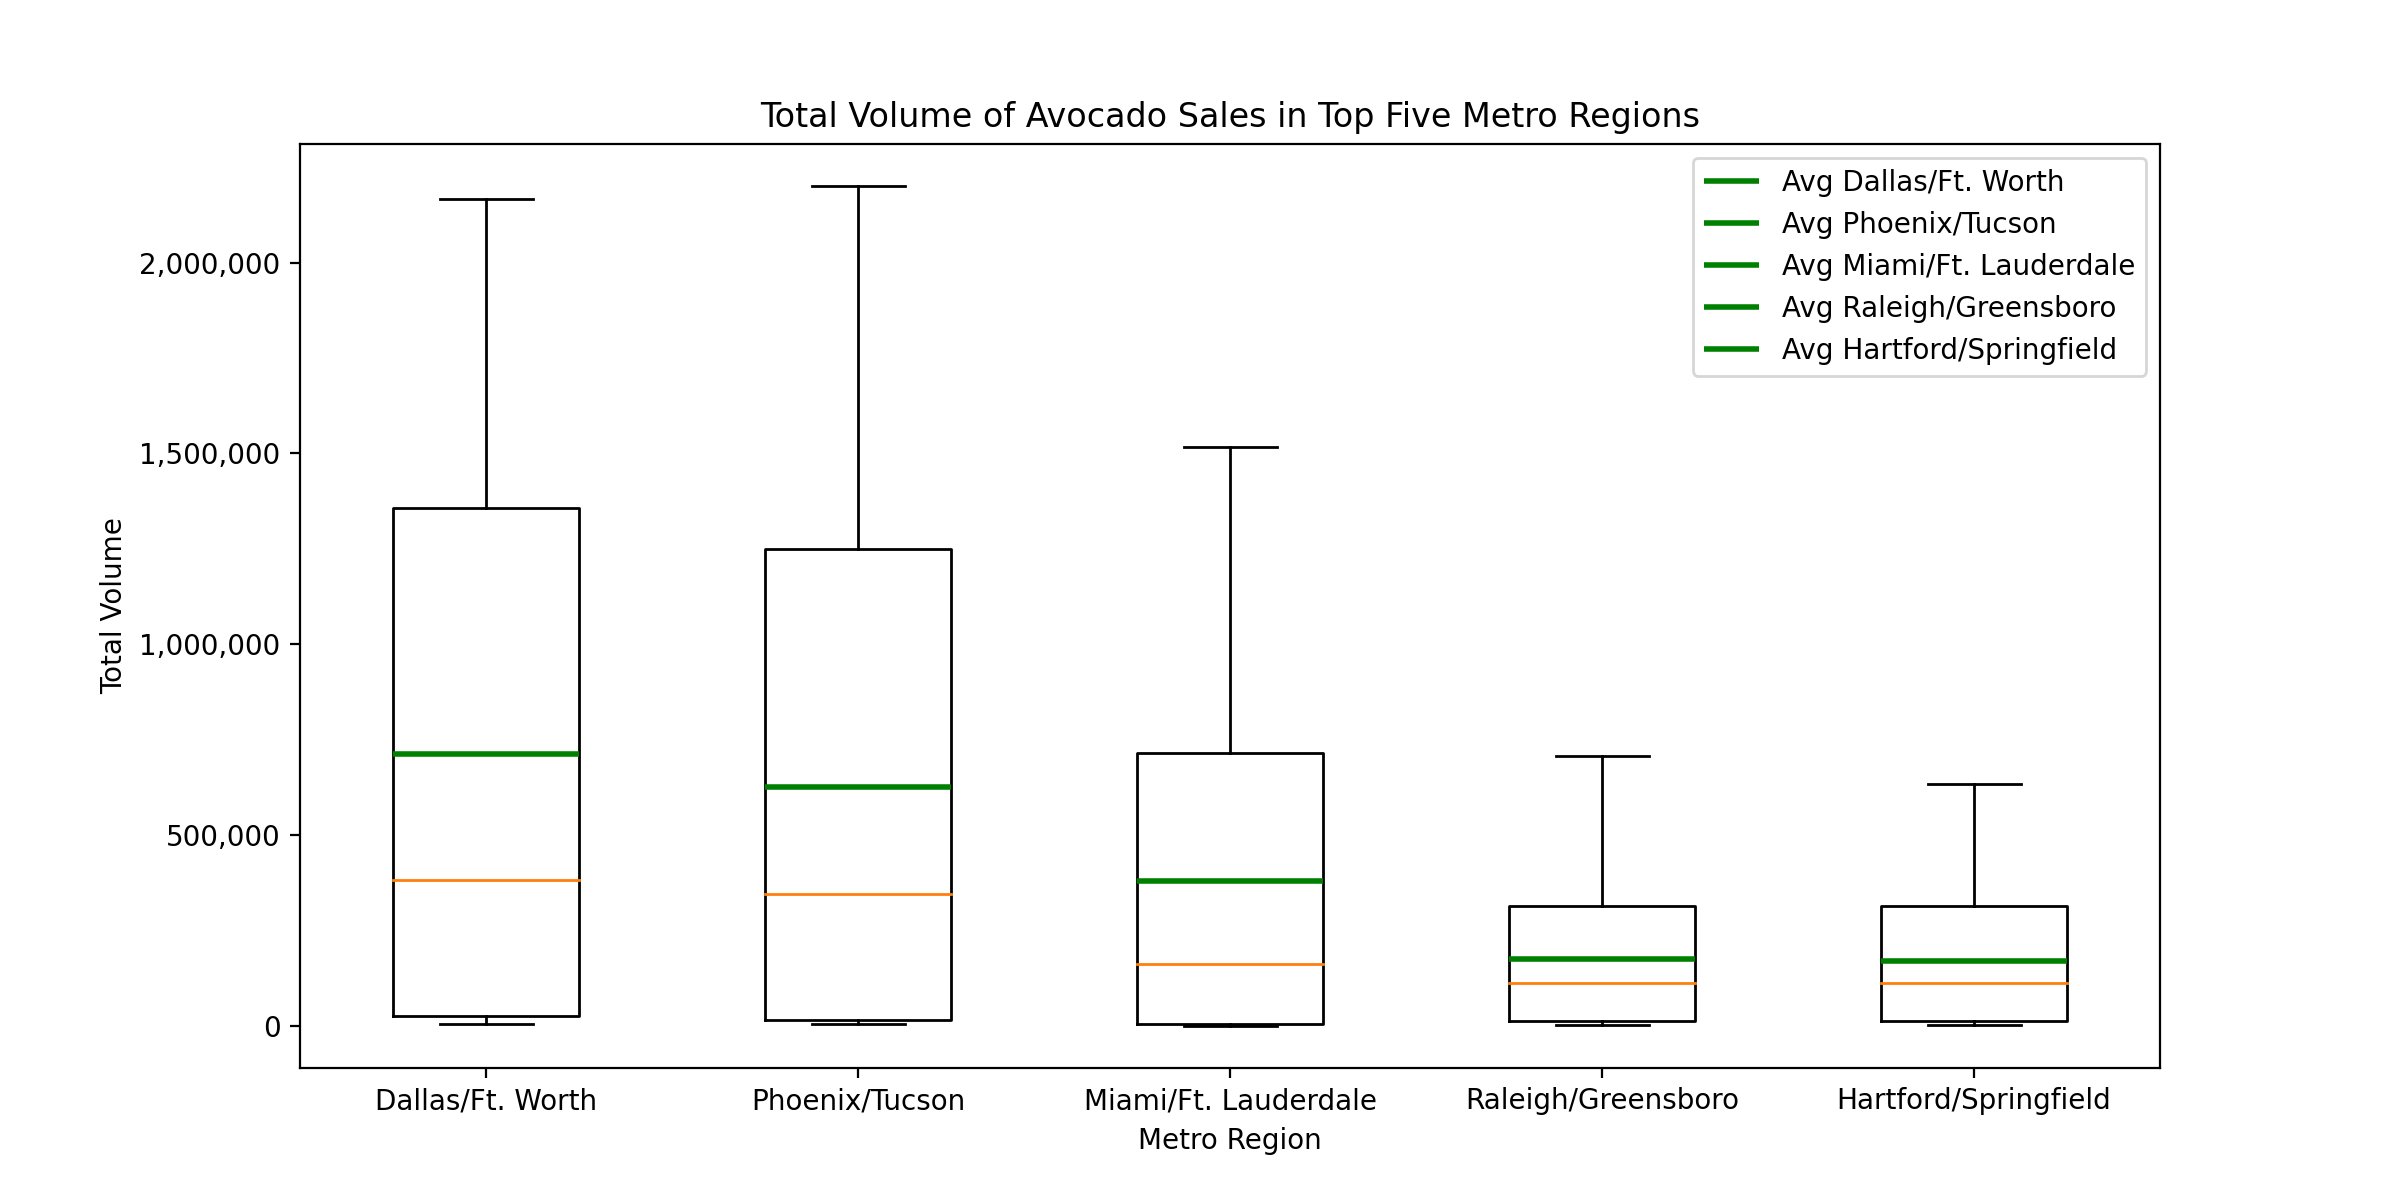

In [70]:
# Step 5: Which metro area geographical regions sold the most total avocados? 
# Plot side-by-side box-plots of the total volume for only the five metro geographical regions 
# with the highest averages for the total_volume variable.

import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Filter the dataset for metro regions only
metro_regions = avoprices[avoprices['geotype'] == 'Metro Region']

# Group the data by metro regions and calculate the total volume and the average total volume
total_volume_by_region = metro_regions.groupby('geography')['total_volume'].sum()
average_volume_by_region = metro_regions.groupby('geography')['total_volume'].mean()

# Find the top five metro regions with the highest average total volume
top_five_regions = average_volume_by_region.nlargest(5)

# Filter the data for top five metro regions
top_five_data = metro_regions[metro_regions['geography'].isin(top_five_regions.index)]

# Create the box plots for the total volume in top five metro regions
plt.figure(figsize=(12, 6))
boxplot_data = [top_five_data[top_five_data['geography'] == region]['total_volume'] for region in top_five_regions.index]
plt.boxplot(boxplot_data, labels=top_five_regions.index)

# Plot the average total volume for each metro region as green lines
for i, region in enumerate(top_five_regions.index):
    avg_volume = average_volume_by_region[region]
    plt.hlines(avg_volume, i + 1 - 0.25, i + 1 + 0.25, colors='g', linewidth=2, label=f'Avg {region}')

plt.title('Total Volume of Avocado Sales in Top Five Metro Regions')
plt.xlabel('Metro Region')
plt.ylabel('Total Volume')

# Set custom tick labels for y-axis
tick_labels = ['{:,.0f}'.format(x) for x in plt.gca().get_yticks()]
tick_positions = FixedLocator(plt.gca().get_yticks())
plt.gca().set_yticklabels(tick_labels)
plt.gca().yaxis.set_major_locator(tick_positions)

plt.legend()
plt.show()

In [71]:
top_five_regions

geography
Dallas/Ft. Worth        712751.896814
Phoenix/Tucson          625038.257500
Miami/Ft. Lauderdale    378668.053399
Raleigh/Greensboro      176436.771552
Hartford/Springfield    170923.146716
Name: total_volume, dtype: float64

In [85]:
# Pivoting

# Step 6: Create a data set with only these California regions and answer the following questions:
# Filter the original dataset for the specified California regions
california_avocados = avoprices[(avoprices['geography'].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"])) & 
                                (avoprices['geotype'] == 'City')]

Summary Statistics for Price Difference:
type   conventional   organic  price_diff
count      4.000000  4.000000    4.000000
mean       1.214208  1.841642    0.627435
std        0.162557  0.224525    0.089368
min        1.047124  1.574902    0.527778
25%        1.097173  1.742500    0.565817
50%        1.204608  1.836111    0.631503
75%        1.321642  1.935253    0.693121
max        1.400490  2.119444    0.718954


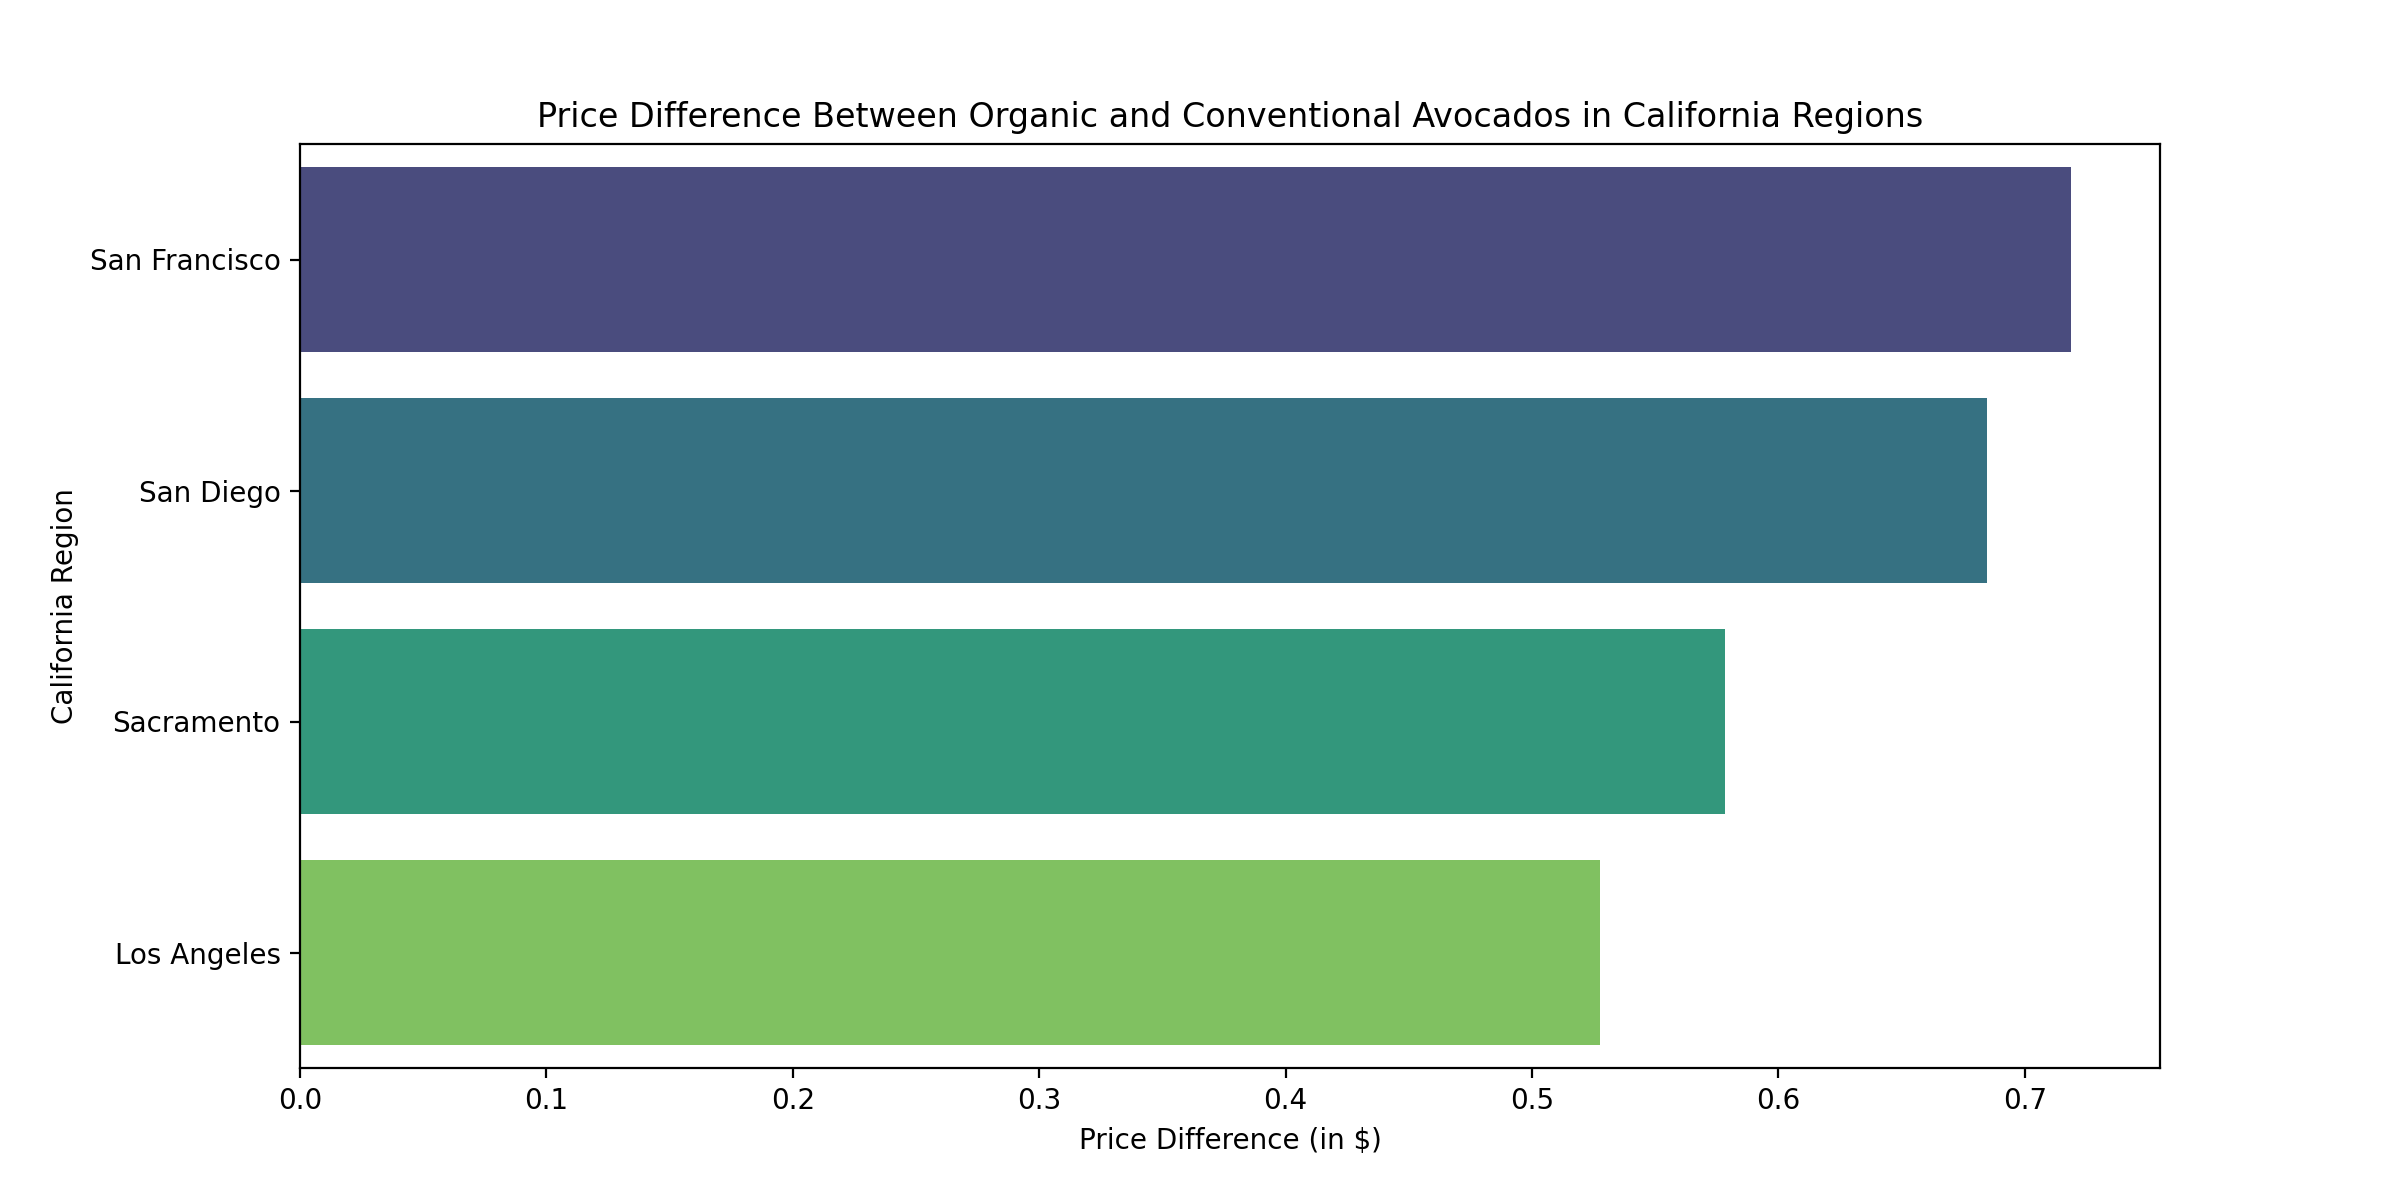

In [86]:
# Step 7: In which California regions is the price of organic versus conventional avocados most different? 
# Support your answer with a few summary statistics AND a visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataset named "california_avocados" with the specified columns

# Calculate the average price difference between organic and conventional avocados for each region
price_difference_by_region = california_avocados.groupby(['geography', 'type'])['average_price'].mean().unstack().reset_index()
price_difference_by_region['price_diff'] = price_difference_by_region['organic'] - price_difference_by_region['conventional']

# Sort regions by the absolute price difference in descending order
price_difference_by_region = price_difference_by_region.sort_values(by='price_diff', ascending=False)

# Create a bar plot to visualize the price difference
plt.figure(figsize=(12, 6))
sns.barplot(x='price_diff', y='geography', data=price_difference_by_region, palette='viridis')
plt.title('Price Difference Between Organic and Conventional Avocados in California Regions')
plt.xlabel('Price Difference (in $)')
plt.ylabel('California Region')

# Display summary statistics for the price difference
summary_stats = price_difference_by_region.describe()

print("Summary Statistics for Price Difference:")
print(summary_stats)

plt.show()

In [87]:
# Define the columns to melt (small_avo, medium_avo, large_avo) into a single "size" variable
columns_to_melt = ['small_avo', 'medium_avo', 'large_avo']

# Perform the data transformation using pd.melt()
california_avocados = pd.melt(california_avocados, id_vars=['date', 'average_price', 'type', 'year', 'geography', 'total_volume', 'geotype'], value_vars=columns_to_melt, var_name='size', value_name='quantity')

# Convert the "size" column to categorical for better analysis
california_avocados['size'] = california_avocados['size'].map({'small_avo': 'Small', 'medium_avo': 'Large', 'large_avo': 'XLarge'})

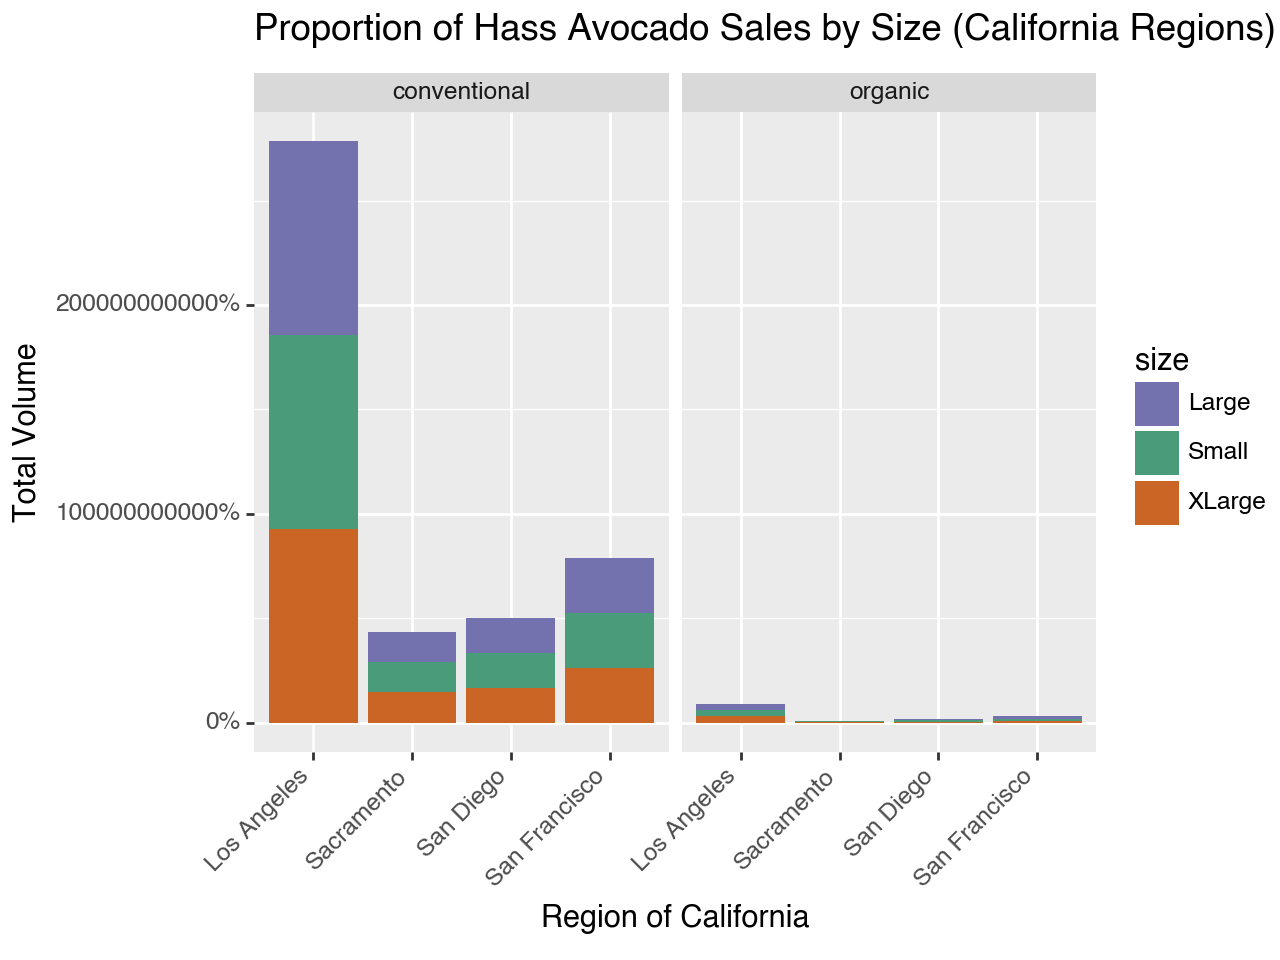

<Figure Size: (640 x 480)>

In [88]:
# Plot the data
(ggplot(california_avocados, aes(x="geography", fill="size"))
     + geom_bar(stat="identity", position="stack")
     + facet_wrap("type")
     + aes(y="total_volume")
     + scale_y_continuous(labels=lambda v: ["%d%%" % (val * 100) for val in v])
     + labs(title='Proportion of Hass Avocado Sales by Size (California Regions)', y='Total Volume', x='Region of California')
     + theme(axis_text_x=element_text(rotation=45, hjust=1))
     + scale_fill_manual(values=('#7371ae', '#4a9b7a', '#cb6526'))
)

In [95]:
import numpy as np
from datetime import datetime, timedelta

# Set a random seed for reproducibility
np.random.seed(0)

# Define the start and end dates for the last 3 years
end_date = datetime.now()
start_date = end_date - timedelta(days=365*3)

# Generate 50 random dates within the last 3 years
dates = [start_date + timedelta(days=np.random.randint(0, 365*3)) for _ in range(50)]

# Generate 50 random housing prices for each city
house_prices_la = np.random.randint(350000, 1500000, size=50)
house_prices_sac = np.random.randint(250000, 800000, size=50)
house_prices_sf = np.random.randint(600000, 3000000, size=50)
house_prices_sd = np.random.randint(350000, 1300000, size=50)


# Create a DataFrame for each city's randomly generated housing prices
la_housing_data = pd.DataFrame({
    'date': dates,
    'geography': 'Los Angeles',
    'house_price': house_prices_la
})

sac_housing_data = pd.DataFrame({
    'date': dates,
    'geography': 'Sacramento',
    'house_price': house_prices_sac
})

sf_housing_data = pd.DataFrame({
    'date': dates,
    'geography': 'San Francisco',
    'house_price': house_prices_sf
})

sd_housing_data = pd.DataFrame({
    'date': dates,
    'geography': 'San Diego',
    'house_price': house_prices_sd
})

In [96]:
# Combine the datasets into one California housing dataset
cali_housing_data = pd.concat([sd_housing_data, sf_housing_data, sac_housing_data, la_housing_data], ignore_index=True)

/var/folders/2s/fpkp2sm54wn5370x80nz75lc0000gn/T/ipykernel_26155/2233175318.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


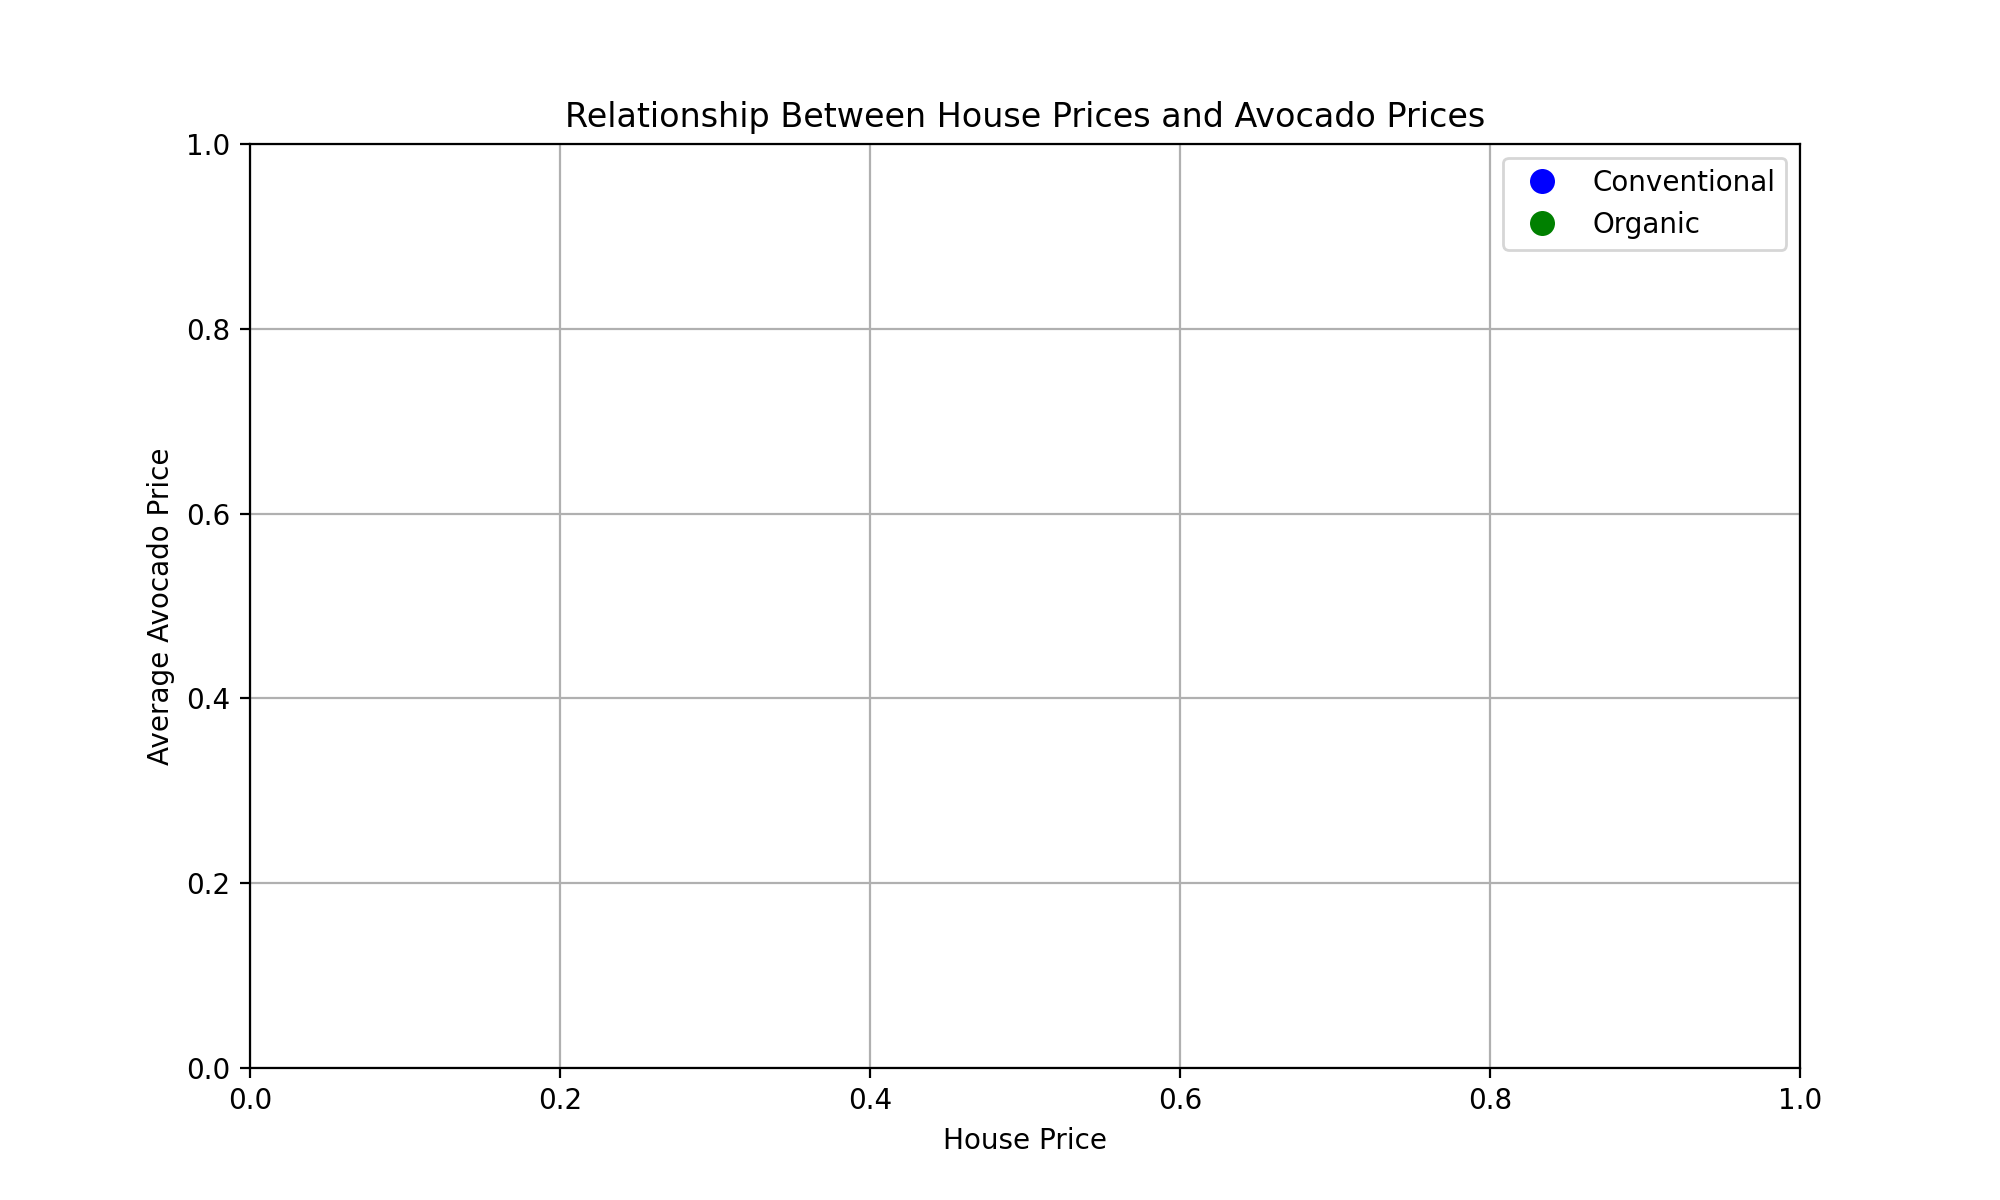

In [99]:
# Convert the 'date' column in california_avocados to datetime64[ns] if not already
california_avocados['date'] = pd.to_datetime(california_avocados['date'])

# Merge the two datasets on 'date' and 'geography'
merged_data = pd.merge(california_avocados, cali_housing_data, on=['date', 'geography'], how='inner')

# Specify colors for different 'type' values
type_colors = {'conventional': 'blue', 'organic': 'green'}

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='house_price', y='average_price', data=merged_data, hue='type', palette=type_colors)
plt.title('Relationship Between House Prices and Avocado Prices')
plt.xlabel('House Price')
plt.ylabel('Average Avocado Price')

# Create a legend with custom labels and colors
legend_labels = ['Conventional', 'Organic']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in type_colors.items()]
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper right')

plt.grid(True)
plt.show()